In [1]:
using Interact
using Gadfly;

In [9]:
set_default_plot_size(25cm, 25cm)

---

# Set up

The bivariate linear regression model is defined as:

$$ y = \beta_0 + \beta_1x + u \quad (1) $$

Using $(1)$ and the _zero conditional mean assumption_ - i.e. $E(u|x) = 0$ - we can formulate the population regression function and the sample regression function as:

$$ \textbf{PRF:} \quad E(y|x)=\beta_0 + \beta_1x \quad (2) $$

$$ \textbf{SRF:} \quad \hat{y}=\hat{\beta_0} + \hat{\beta_1}x \quad (3) $$

---

The objective is to plot the training data $(x_i, y_i)$ from the excel file as a scatterplot and get the estimates $\hat{\beta_i}$, for $i = 0, 1$. We also want to plot the SRF.  

Given $\mathbf{\hat{\beta}}$:

$$ \mathbf{\hat{\beta}} = \left[ \begin{array}{cc}
\hat{\beta_0}\\
\hat{\beta_1}\\
\end{array} \right] \quad (3) $$

We now set up our matrix $\textbf{X}$ as:

$$ \textbf{X} = \left[ \begin{array}{cc}
1 & inc\ per\ capita\ _{1}\\
1 & inc\ per\ capita\ _{2}\\
\ldots & \ldots  \\
1 & inc\ per\ capita\ _{40} \end{array} \right] \quad (4) $$

To make use of the fact that:

$$ \hat{\textbf{y}} = \textbf{X}\hat{\beta} \quad (4) $$

Where:

$$ \hat{\beta}  = (\textbf{X}^T \textbf{X})^{-1}\textbf{X}^T \textbf{y} \quad (5) $$

---

## Automatizing

In [11]:
function beta_estimates(x, y)
    X = [ones(x) x]
    return inv(transpose(X)*X)*transpose(X)*y
end;

In [12]:
function srf_plot(x, y, xlabel, ylabel)
    X = [ones(x) x]
    β = inv(transpose(X)*X)*transpose(X)*y

    # Goodness of Fit
    SST = sum(transpose(y-mean(y))*(y-mean(y)))
    SSE = sum(transpose(X*β-mean(y))*(X*β-mean(y)))
    SSR = sum(transpose(y-X*β)*(y-X*β))
    R_squared = SSE/SST
    
    p = plot(
            layer(x = x, y = y, Geom.point),
            layer(x = x, y = X*β, Geom.line),
            Guide.xlabel(xlabel),
            Guide.ylabel(ylabel),
            Guide.title(join(["R-squared, β0, and β1 ==> "," ", string(round(R_squared, 4)), ", ", string(round(β[1], 2)), ", ", string(round(β[2], 2))])),
            )
    return p
    end;

In [13]:
function plot_srf_models(x_values, y_values)
    
    # Plots
    m11 = srf_plot(x_values, y_values, "x", "y")
    m12 = srf_plot(log.(x_values), y_values, "log(x)", "y")
    m21 = srf_plot(x_values, log.(y_values), "x", "log(y)")
    m22 = srf_plot(log.(x_values), log.(y_values), "log(x)", "log(y)")

    gridstack([m11 m12; m21 m22])
    
end;

In [18]:
function goodness_fit(x, y)
    X = [ones(x) x]
    β = inv(transpose(X)*X)*transpose(X)*y

    # Goodness of Fit
    SST = sum(transpose(y-mean(y))*(y-mean(y)))
    SSE = sum(transpose(X*β-mean(y))*(X*β-mean(y)))
    SSR = sum(transpose(y-X*β)*(y-X*β))
    R_squared = SSE/SST
    
    return R_squared
end

goodness_fit (generic function with 1 method)

---

## Test on Engel Data

We are given a set of data from Excel, which we have extracted below (manually, unfortunately):

In [14]:
# Data extracted manually from excel
dairy = [8.87, 6.59, 11.46, 15.07, 15.6, 6.71, 10.02, 7.41, 11.52, 7.47, 6.73, 8.05, 11.03, 10.11, 18.65, 10.3, 15.3, 13.75, 11.49, 6.69, 16.2, 10.39, 13.5, 8.5, 19.77, 9.69, 7.9, 10.15, 13.82, 13.74, 4.91, 20.99, 20.06, 18.93, 13.19, 5.86, 7.43, 7.15, 9.1, 15.3]
inc_per_capita = [1250, 985, 2175, 1025, 1690, 670, 1600, 940, 1730, 640, 860, 960, 1575, 1230, 2190, 1580, 2300, 1720, 850, 780, 2100, 1470, 1225, 1380, 2450, 910, 690, 1450, 2275, 1620, 740, 1125, 1335, 2875, 1680, 870, 1620, 960, 1125, 1875];

Plotting this data:

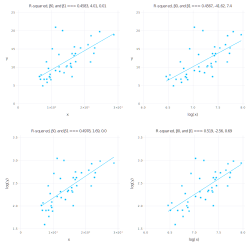

In [15]:
plot_srf_models(inc_per_capita, dairy)

---

## $\textbf{(1.8)}$ 

The Engel Curve shows the relationship between the various quantities of a good that a consumer is wiling to purchase at varying income levels. In a survey with 40 households data were obtained on expenditure on dairy products and income.

---

**(a) Using this database (Engel.xls), obtain estimates and the respective $R^2$ for the following models:**

$$ Linear - log\ model: \quad dairy = \beta_0 + \beta_1 \ln(inc) + u $$
$$ Log - linear\ model: \quad \ln(dairy) = \beta_0 + \beta_1inc + u $$

In [20]:
beta_estimates(inc_per_capita, dairy)

2-element Array{Float64,1}:
 4.01257   
 0.00528787

In [19]:
goodness_fit(inc_per_capita, dairy)

0.4583477663129214

**(b) Estimate the marginal propensity to expenditure and elasticity expenditure/income for both models. Interpret them economically.**

$$ Marginal\ Propensity\ to\ Expenditure = \frac{\partial dairy}{\partial inc}$$

$$ Elasticity\ expenditure/income\ = \frac{\partial dairy}{\partial inc}*\frac{inc}{dairy}$$

**(c) Can you conclude which is the best model by looking at the coeﬃcient of determination?**

The first thing to note is that $R^2$ can only be compared between models that have the same number of observations and if the dependent variables, i.e. $y$, have the same functional form.

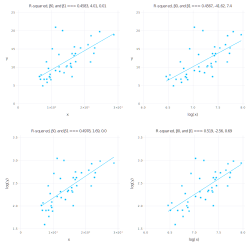

In [21]:
# Let's look again below
plot_srf_models(inc_per_capita, dairy)

Given the plots and information above we can conclude, based on the coefficients of determination, that:

- lin(y) - lin(x) model ($R^2 = 00.4583$) is trivially better than lin(y) - log(x) model ($R^2 = 00.4567$);   
- log(y) - log(x) model ($R^2 = 00.5190$) is "somewhat" better than log(y) - lin(x) model ($R^2 = 00.4978$);  